<a href="https://colab.research.google.com/github/antoniosalinas2000/EB-2022-1-CC50/blob/main/code/TF_Adm_Info_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import numpy as np
import cufflinks as cf
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
#plt.style.use('ggplot')
init_notebook_mode(connected=True)
%matplotlib inline

5.5.0


In [52]:
df = pd.read_csv("MXvideos_cc50_procesada.csv")
df

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category,publish_hour,publish_date
0,0,SbOwzAl9ZfQ,2017-11-14,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,...,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514),Entertainment,01:06,2017-11-13
1,1,klOV6Xh-DnI,2017-11-14,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,13/11/2017 0:11,La Voz Mexico 7,104972,271,...,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316),People & Blogs,00:11,2017-11-13
2,2,6L2ZF7Qzsbk,2017-11-14,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,...,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398),News & Politics,12:00,2017-11-13
3,3,hcY52MFWMDM,2017-11-14,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153,378,...,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418),News & Politics,22:47,2017-12-11
4,4,_OXDcGPVAa4,2017-11-14,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,...,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935),Howto & Style,14:17,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,40446,r63VBOagGAo,2018-06-14,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17,13/06/2018 8:11,"Canal|""Oficial""|""da""|""Federação""|""Portuguesa""|...",653114,1246,...,FALSO,FALSO,Portugal's Football Team Official SongLyrics: ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514),Sports,08:11,2018-06-13
40447,40447,i7r_kMbyngk,2018-06-14,AMLO llegó con su esposa al Tercer Debate en M...,AMX,25,12/6/2018 20:15,"AMLO|""morena""|""política""|""PRI""|""PAN""|""PRD""|""Ló...",121674,3558,...,FALSO,FALSO,AMLO llegó con su esposa al Tercer Debate en M...,Veracruz,17.939976,-94.739990,POINT (-94.73999007 17.93997601),News & Politics,20:15,2018-12-06
40448,40448,_jnwjdMe3Zo,2018-06-14,Maire usa una blusa kawaiii ¿adorable o ridícula?,Historias Wink,24,13/06/2018 10:08,"maire|""maire vs el internet""|""maire vs interne...",14067,538,...,FALSO,FALSO,Maire usa una blusa kawaii de Alicia en el paí...,Nuevo Leon,25.189999,-99.839989,POINT (-99.83998885 25.1899986),Entertainment,10:08,2018-06-13
40449,40449,pAH9omNAWA4,2018-06-14,La Jefa del Campeón - Capítulo 2 Parte 3/4,Tele Time,22,12/6/2018 21:22,"El Alfa El Jefe|""El Jefe Records""|""Latino""|""Mu...",22898,94,...,FALSO,FALSO,"Dicen que lo barato sale caro, y el día de hoy...",Baja California Sur,26.013333,-111.351664,POINT (-111.3516635 26.01333335),People & Blogs,21:22,2018-12-06


1. ¿Qué categorías de videos son las de mayor tendencia?

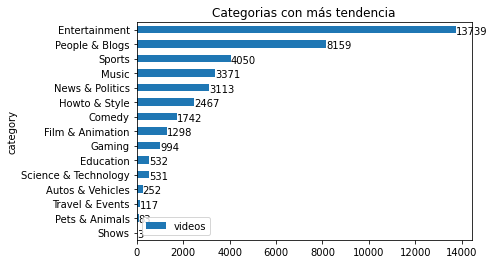

In [53]:
dcat = df.groupby(by='category').size().reset_index(name='videos')
dcat = dcat.sort_values(by="videos")
ax = dcat.plot.barh(y='videos', x='category')
plt.title("Categorias con más tendencia")
for i, v in enumerate(dcat['videos']):
    plt.text(v, i-0.3, str(v))

In [54]:
dfc['category'].value_counts()

Entertainment           13739
People & Blogs           8159
Sports                   4050
Music                    3371
News & Politics          3113
Howto & Style            2467
Comedy                   1742
Film & Animation         1298
Gaming                    994
Education                 532
Science & Technology      531
Autos & Vehicles          252
Travel & Events           117
Pets & Animals             83
Shows                       3
Name: category, dtype: int64

2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

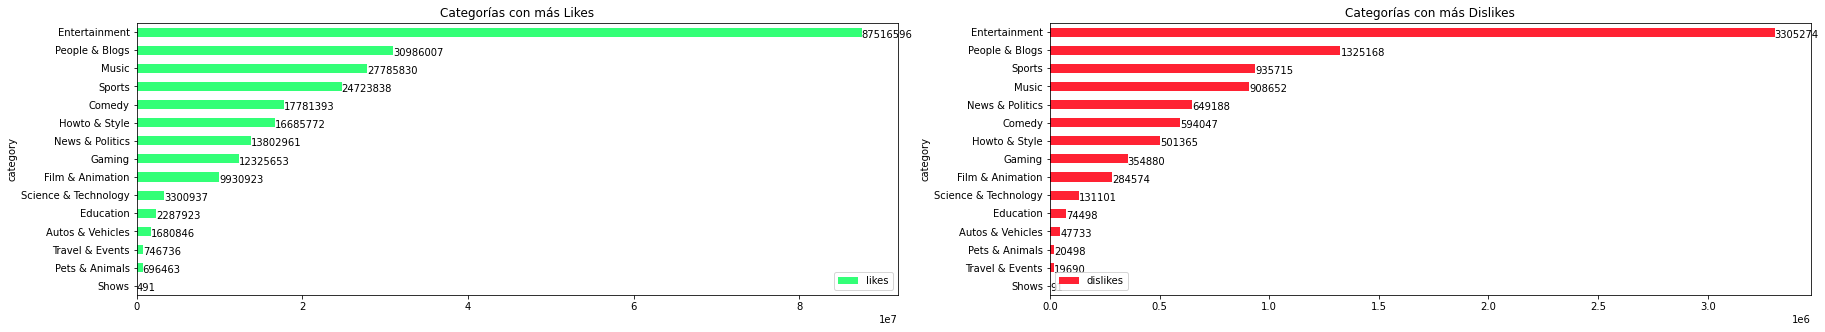

In [55]:
dfc = df.copy()

fig = plt.figure(figsize=(30, 5))
ax1 = fig.add_subplot(121)

df_like = dfc.groupby(by='category').sum()['likes'].reset_index(name='likes')
df_dislike = dfc.groupby(by='category').sum()['dislikes'].reset_index(name='dislikes')

df_like = df_like.sort_values(by='likes')
df_dislike = df_dislike.sort_values(by='dislikes')

df_like.plot.barh(x='category', y='likes', title="Categorías con más Likes", ax=ax1,color='#33ff77')
for i, v in enumerate(df_like['likes']):
    plt.text(v, i-0.3, str(int(v)))
ax2 = fig.add_subplot(122)
df_dislike.plot.barh(x='category', y='dislikes', title="Categorías con más Dislikes", ax=ax2,color='#ff2233')
for i, v in enumerate(df_dislike['dislikes']):
    plt.text(v, i-0.3, str(int(v)))

In [56]:
dfc.groupby(['category'])['likes'].agg('sum').sort_values(ascending = False)

category
Entertainment           87516596
People & Blogs          30986007
Music                   27785830
Sports                  24723838
Comedy                  17781393
Howto & Style           16685772
News & Politics         13802961
Gaming                  12325653
Film & Animation         9930923
Science & Technology     3300937
Education                2287923
Autos & Vehicles         1680846
Travel & Events           746736
Pets & Animals            696463
Shows                        491
Name: likes, dtype: int64

In [57]:
dfc.groupby(['category'])['dislikes'].agg('sum').sort_values(ascending = False)

category
Entertainment           3305274
People & Blogs          1325168
Sports                   935715
Music                    908652
News & Politics          649188
Comedy                   594047
Howto & Style            501365
Gaming                   354880
Film & Animation         284574
Science & Technology     131101
Education                 74498
Autos & Vehicles          47733
Pets & Animals            20498
Travel & Events           19690
Shows                        91
Name: dislikes, dtype: int64

3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

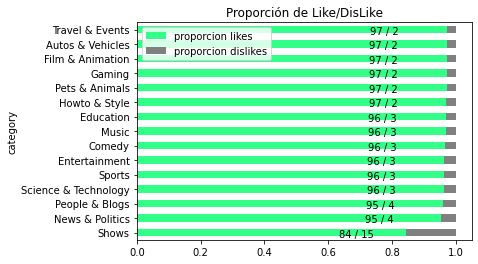

In [58]:
dfc = df.copy()

d1 = dfc.groupby(by='category').sum()['likes'].reset_index(name='likes')
d2 = dfc.groupby(by='category').sum()['dislikes'].reset_index(name='dislikes')

d1['dislikes'] = d2['dislikes']

d1['proporcion likes'] = d1['likes']/(d1['likes'] + d1['dislikes'])
d1['proporcion dislikes'] = d1['dislikes']/(d1['likes'] + d1['dislikes'])


d1 = d1.sort_values(by='proporcion likes')

d1.plot.barh(x='category',
             y=['proporcion likes', 'proporcion dislikes'],
             color=['#33ff88', 'gray'],
             stacked=True,
             title="Proporción de Like/DisLike")
for i, v in enumerate(d1['proporcion likes']):
    plt.text(v*0.75, i-0.3, str(int(v*100))+" / "+str(int((1-v)*100)))

In [89]:
d1 = d1.sort_values(by='proporcion dislikes')
d1

,category,likes,dislikes,proporcion likes,proporcion dislikes
14,Travel & Events,746736,19690,0.974309,0.025691
0,Autos & Vehicles,1680846,47733,0.972386,0.027614
4,Film & Animation,9930923,284574,0.972143,0.027857
5,Gaming,12325653,354880,0.972014,0.027986
10,Pets & Animals,696463,20498,0.971410,0.028590
6,Howto & Style,16685772,501365,0.970829,0.029171
2,Education,2287923,74498,0.968465,0.031535
7,Music,27785830,908652,0.968334,0.031666
1,Comedy,17781393,594047,0.967672,0.032328
3,Entertainment,87516596,3305274,0.963607,0.036393


4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

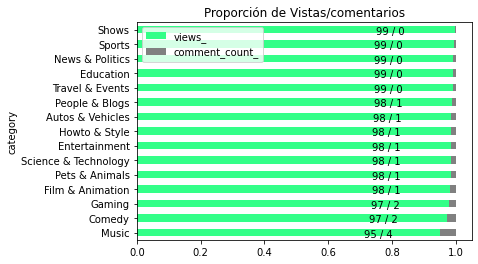

In [60]:
dfc = df.copy()


dfc['views_'] = dfc['views'] / (dfc['comment_count']+dfc['views'])
dfc['comment_count_'] = dfc['comment_count'] / (dfc['comment_count']+dfc['views'])

dnx_ = dfc.groupby(by='category').mean()['views_'].reset_index(name='views_')
_ = dfc.groupby(by='category').mean()['comment_count_'].reset_index(name='comment_count_')
dnx_['comment_count_'] = _["comment_count_"]


dnx_ = dnx_.sort_values(by='views_')

dnx_.plot.barh(x='category', y=['views_', 'comment_count_'],
             color=['#33ff88', 'gray'],
             stacked=True,
             title="Proporción de Vistas/comentarios")
for i, v in enumerate(dnx_['views_']):
    plt.text(v*0.75, i-0.3, str(int(v*100))+" / "+str(int((1-v)*100)))

In [87]:
dnx_ = dnx_.sort_values(by='comment_count_')
dnx_

,category,views_,comment_count_
12,Shows,0.998521,0.001479
13,Sports,0.993159,0.006841
8,News & Politics,0.992554,0.007446
2,Education,0.991106,0.008894
14,Travel & Events,0.990275,0.009725
9,People & Blogs,0.989904,0.010096
0,Autos & Vehicles,0.985856,0.014144
6,Howto & Style,0.984948,0.015052
3,Entertainment,0.984642,0.015358
11,Science & Technology,0.984182,0.015818


5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

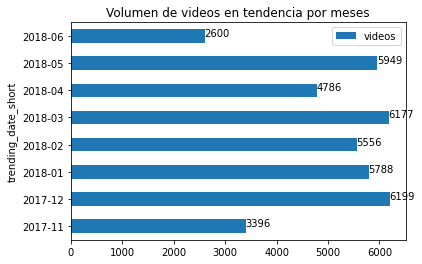

In [62]:
dfc = df.copy()

def testNumbers(x):
    return float(x[0]) > 2000

dfc = dfc[dfc['trending_date'].str.split("-").map(type) == list]
dfc = dfc[dfc['trending_date'].str.split("-").map(testNumbers)]
dfc['trending_date'] = pd.to_datetime(dfc['trending_date'], format="%Y-%m-%d")

dfc['trending_date_short'] = dfc['trending_date'].map(lambda x:"%d-%02d"%(x.year,x.month))


dfx = dfc.groupby(by='trending_date_short').size().reset_index(name='videos')
dfx = dfx.sort_values(by="trending_date_short")
dfx.plot.barh(x='trending_date_short', y='videos', title="Volumen de videos en tendencia por meses")
for i, v in enumerate(dfx['videos']):
    plt.text(v, i, str(int(v)))

Text(0.5, 1.0, 'Volumen de los videos en tendencia a lo largo del tiempo')

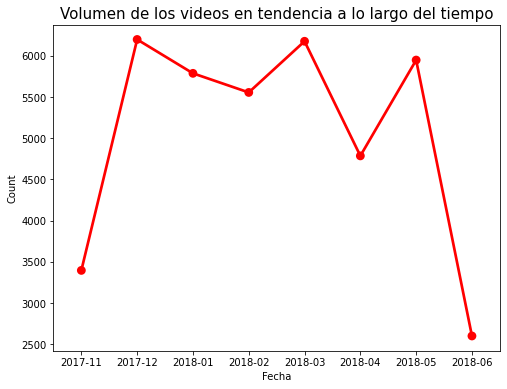

In [93]:
dfc = df.copy()

dfc["trending_date"] = pd.to_datetime(dfc["trending_date"])
by_tDate = dfc.groupby(dfc["trending_date"].dt.to_period('M')).count()

a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)

sns.pointplot(x=by_tDate.index, y='views',data=by_tDate, color="red")
ax.set_xlabel('Fecha')
ax.set_ylabel('Count')
ax.set_title('Volumen de los videos en tendencia a lo largo del tiempo', fontsize=15)

In [66]:
by_tDate["views"]

trending_date
2017-11    3396
2017-12    6199
2018-01    5788
2018-02    5556
2018-03    6177
2018-04    4786
2018-05    5949
2018-06    2600
Freq: M, Name: views, dtype: int64

6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12484 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 12484 missing from current font.



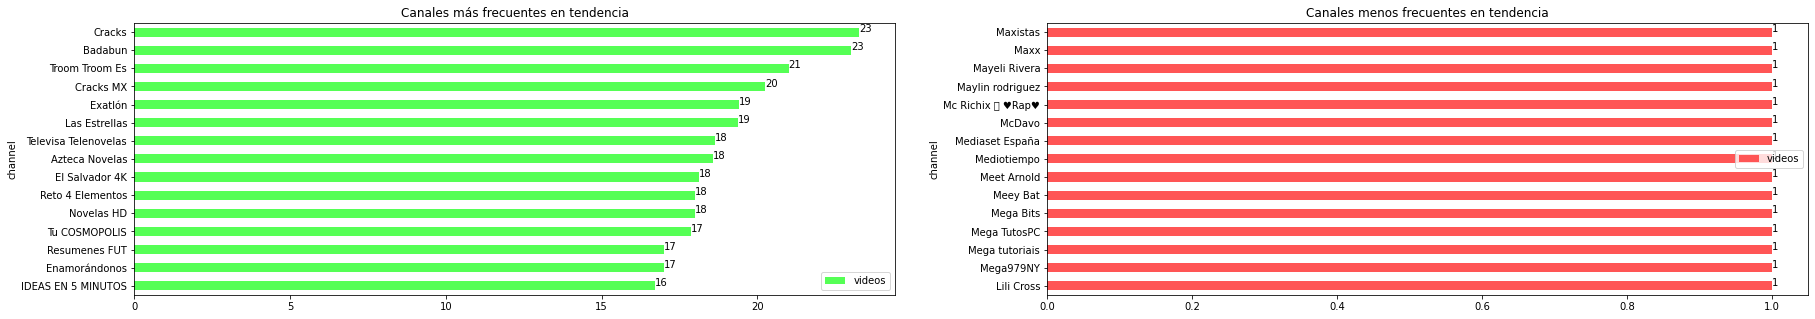

In [90]:
dfc = df.copy()

fig = plt.figure(figsize=(30, 5))
ax1 = fig.add_subplot(121)


def testNumbers(x):
    return float(x[0]) > 2000

dfc = dfc[dfc['trending_date'].str.split("-").map(type) == list]
dfc = dfc[dfc['trending_date'].str.split("-").map(testNumbers)]
dfc['trending_date'] = pd.to_datetime(dfc['trending_date'], format="%Y-%m-%d")

dfc['trending_date_short'] = dfc['trending_date'].map(lambda x:"%d-%02d"%(x.year,x.month))

dfc['channel_date'] = dfc['trending_date_short'] + "¶" + dfc['channel_title']

dfx = dfc.groupby(by='channel_date').size().reset_index(name='videos')

date, channel = zip(*dfx['channel_date'].str.split('¶'))
dfx['date'] = date
dfx['channel'] = channel

plt.rcParams['font.sans-serif']=['SimHei']

dfx = dfx.groupby(by='channel').mean()['videos'].reset_index(name='videos')
dfx = dfx.sort_values(by="videos")
dfx.tail(15).plot.barh(x='channel', y='videos', ax=ax1, color="#55ff55", title="Canales más frecuentes en tendencia")
for i, v in enumerate(dfx['videos'].tail(15)):
    plt.text(v, i, str(int(v)))

ax2 = fig.add_subplot(122)
dfx.head(15).plot.barh(x='channel', y='videos', ax=ax2, color="#ff5555", title="Canales menos frecuentes en tendencia")
for i, v in enumerate(dfx['videos'].head(15)):
    plt.text(v, i, str(int(v)))

In [68]:
dfc['channel_title'].value_counts().iloc[:15]

Cracks                     186
Badabun                    184
Troom Troom Es             168
Cracks MX                  162
Las Estrellas              155
Televisa Telenovelas       149
El Salvador 4K             145
Tu COSMOPOLIS              143
Enamorándonos              136
Ventaneando                133
Draw My Life en Español    131
Azteca Novelas             130
Campechaneando             129
TikTak Draw                128
Imagen Entretenimiento     126
Name: channel_title, dtype: int64

In [69]:
dfc['channel_title'].value_counts().sort_values().iloc[:15]

FPFutebolOficial                   1
MohamdAssi Tv                      1
Phillipe LF MX                     1
The Anime Man                      1
1theK (원더케이)                       1
Konohamaru The Eight               1
Samsung US                         1
LuoKho Animation                   1
Talking Tom and Friends Español    1
EL procorito vlogs                 1
MegaGlowen                         1
FueTT                              1
ECKO                               1
Plano Invertido                    1
Memes FUT                          1
Name: channel_title, dtype: int64

7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”? 

In [77]:
dfc=df.copy()
data_state = dfc.groupby(dfc["state"]).sum()[["views", "likes", "dislikes"]]
data_state.reset_index(level=0, inplace=True)

In [82]:
states = dfc[["state","likes","views","dislikes"]]
statesMap = states.groupby(['state'], as_index=False)['likes','dislikes','views'].sum()
statesMap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,state,likes,dislikes,views
0,Aguascalientes,8024967,304649,205263001
1,Baja California,8146269,303996,200912249
2,Baja California Sur,7192867,274718,193485140
3,Campeche,8659190,328371,204245768
4,Chiapas,8021512,314216,214840441
5,Chihuahua,7647193,310111,205158940
6,Coahuila,7515544,285221,209300956
7,Colima,7567378,282294,205854423
8,Distrito Federal,7941841,291993,195938599
9,Durango,8017392,286450,201439056


In [74]:
dfc['category'].value_counts()

Entertainment           13739
People & Blogs           8159
Sports                   4050
Music                    3371
News & Politics          3113
Howto & Style            2467
Comedy                   1742
Film & Animation         1298
Gaming                    994
Education                 532
Science & Technology      531
Autos & Vehicles          252
Travel & Events           117
Pets & Animals             83
Shows                       3
Name: category, dtype: int64

#ADICIONAL
---
¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?



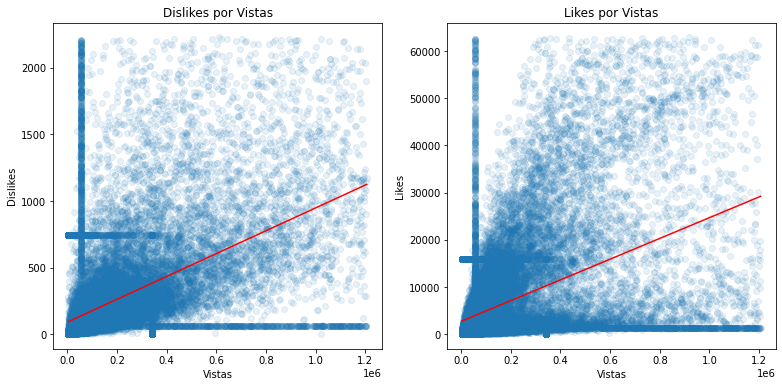

In [ ]:
dfc = df.copy()

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dfc = dfc[dfc['views'].notnull()]
dfc = dfc[dfc['likes'].notnull()]
dfc = dfc[dfc['dislikes'].notnull()]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20, 6))

for yd, d, name in [['dislikes', 131, "Dislikes"], ['likes', 132, "Likes"]]:
    x = dfc['views'].values
    y = dfc[yd].values
    a, b = x.min(), x.max()
    plt.subplot(d)
    plt.scatter(x, y, alpha=0.1)
    x = np.array([ np.ones(len(x)), x]).T
    B = np.linalg.inv(x.T @ x) @ x.T @ y
    plt.plot([a, b], [B[0] + B[1] * a, B[0] + B[1]* b], c="red")
    plt.title(name + ' por Vistas')
    plt.xlabel('Vistas')
    plt.ylabel(name)
plt.show()